In [1]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load Dataset
dataset = pd.read_csv('./iris.csv')
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
#Create x and y variables
x = dataset.drop('species', axis=1).to_numpy()
y = dataset['species'].to_numpy()

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y,test_size=0.20,random_state=100)

#Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

#Models
from sklearn.neighbors import KNeighborsClassifier

In [4]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train2,y_train)
predictions=knn.predict(x_test2)

In [5]:
y_test

array(['versicolor', 'versicolor', 'virginica', 'virginica', 'setosa',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'setosa', 'virginica',
       'setosa', 'setosa', 'versicolor', 'setosa', 'virginica', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'setosa',
       'setosa', 'virginica', 'virginica', 'versicolor'], dtype=object)

In [6]:
predictions

array(['versicolor', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'setosa', 'virginica',
       'setosa', 'setosa', 'versicolor', 'setosa', 'virginica', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'virginica', 'versicolor'], dtype=object)

In [7]:
from sklearn.metrics import classification_report, confusion_matrix  
print('\nEstimator:KNN') 
target_names=['setosa','versicolor','virginica']
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions,target_names=target_names))


Estimator:KNN
[[10  0  0]
 [ 0 10  0]
 [ 0  4  6]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.71      1.00      0.83        10
   virginica       1.00      0.60      0.75        10

    accuracy                           0.87        30
   macro avg       0.90      0.87      0.86        30
weighted avg       0.90      0.87      0.86        30



In [11]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,_=roc_curve(y_test,predictions)

ValueError: multiclass format is not supported

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize

#Load Dataset
dataset = pd.read_csv('./iris.csv')
dataset.head()
#Create x and y variables
x = dataset.drop('species', axis=1).to_numpy()
y = dataset['species'].to_numpy()

le = LabelEncoder()
y1 = dataset['species']
y2 = le.fit_transform(y1)
x2 = dataset.drop('species', axis=1).values

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x2, y2, stratify=y2,test_size=0.20,random_state=100)

#Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)


#Models
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)

[[0.   1.   0.  ]
 [0.   1.   0.  ]
 [0.   0.75 0.25]
 [0.   0.5  0.5 ]
 [1.   0.   0.  ]
 [0.   0.   1.  ]
 [0.   1.   0.  ]
 [1.   0.   0.  ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [1.   0.   0.  ]
 [0.   0.   1.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [0.   1.   0.  ]
 [1.   0.   0.  ]
 [0.   0.25 0.75]
 [1.   0.   0.  ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [1.   0.   0.  ]
 [0.   1.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [0.   0.75 0.25]
 [0.   0.   1.  ]
 [0.   0.75 0.25]]
[2. 1. 0.]
[2.   1.   0.75 0.25 0.  ]
[2.   1.   0.5  0.25 0.  ]


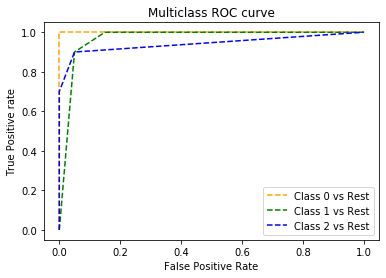

In [13]:
from sklearn.multiclass import OneVsRestClassifier
# fit model
clf = OneVsRestClassifier(knn)
clf.fit(x_train2, y_train)
pred = clf.predict(x_test2)
pred_prob = clf.predict_proba(x_test2)
print(pred_prob)
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 